In [2]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Explore the dataset

In [3]:
df = pd.read_csv('../input/diabets/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**All the numbers are numerical values which can be used for analysis without treatment of data types**

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


***The columns Glucose, Blood Pressure, Skin Thickness, Insulin and BMI have zero values which does not make sense.
Let's replace them with appropriate central value.***

In [7]:
df.Glucose.value_counts()[0], df.BloodPressure.value_counts()[0], df.SkinThickness.value_counts()[0], df.Insulin.value_counts()[0], df.BMI.value_counts()[0]

(5, 35, 227, 374, 11)

### First replace the zero values with nan so it does not affect the central value

In [10]:
df.Glucose.replace(0, np.nan, inplace=True), df.BloodPressure.replace(0, np.nan, inplace=True), df.SkinThickness.replace(0, np.nan, inplace=True), df.Insulin.replace(0, np.nan, inplace=True), df.BMI.replace(0, np.nan, inplace=True)

(None, None, None, None, None)

In [15]:
df.replace(np.nan, {'Glucose': df.Glucose.median(), 'BloodPressure': df.BloodPressure.median(), 'SkinThickness': df.SkinThickness.median(), 'Insulin': df.Insulin.median(), 'BMI': df.BMI.median()}, inplace=True)

(array([ 52., 161., 207., 193.,  91.,  48.,  10.,   4.,   1.,   1.]),
 array([18.2 , 23.09, 27.98, 32.87, 37.76, 42.65, 47.54, 52.43, 57.32,
        62.21, 67.1 ]),
 <BarContainer object of 10 artists>)

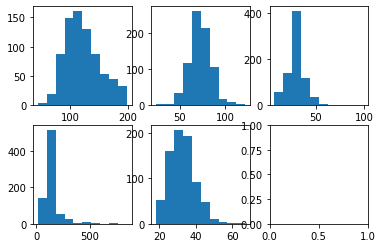

<Figure size 720x720 with 0 Axes>

In [27]:
fig, axs = plt.subplots(2,3)
plt.figure(figsize=(10,10))
axs[0,0].hist(df.Glucose)
axs[0,1].hist(df.BloodPressure)
axs[0,2].hist(df.SkinThickness)
axs[1,0].hist(df.Insulin)
axs[1,1].hist(df.BMI)

In [29]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<BarContainer object of 9 artists>

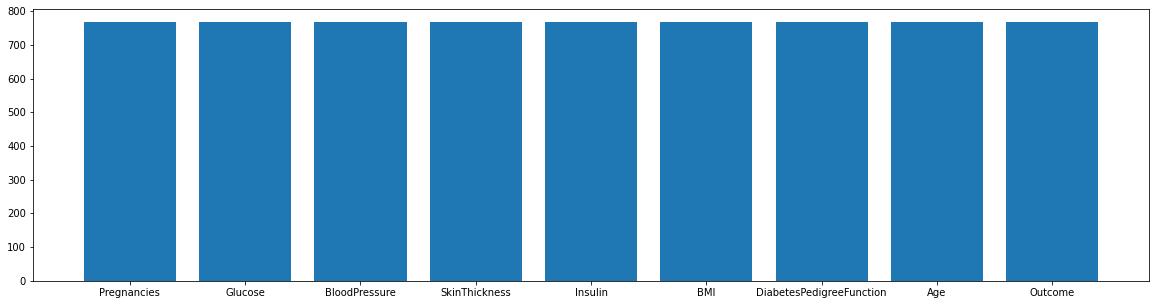

In [32]:
column_counts = df.count()
column_types = df.dtypes

plt.figure(figsize=(20,5))
plt.bar(x=column_counts.index, height=column_counts.values)

<BarContainer object of 2 artists>

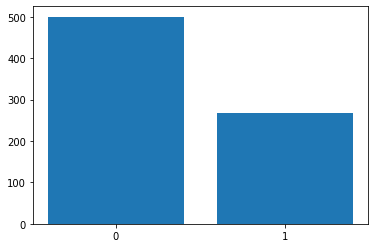

In [33]:
outcome_counts = df.Outcome.value_counts()

plt.bar(outcome_counts.index, outcome_counts.values, tick_label=[0,1] ) #Unbalanced so we will use SMOTE later

***The Outcome is imbalanced, might need oversampling***

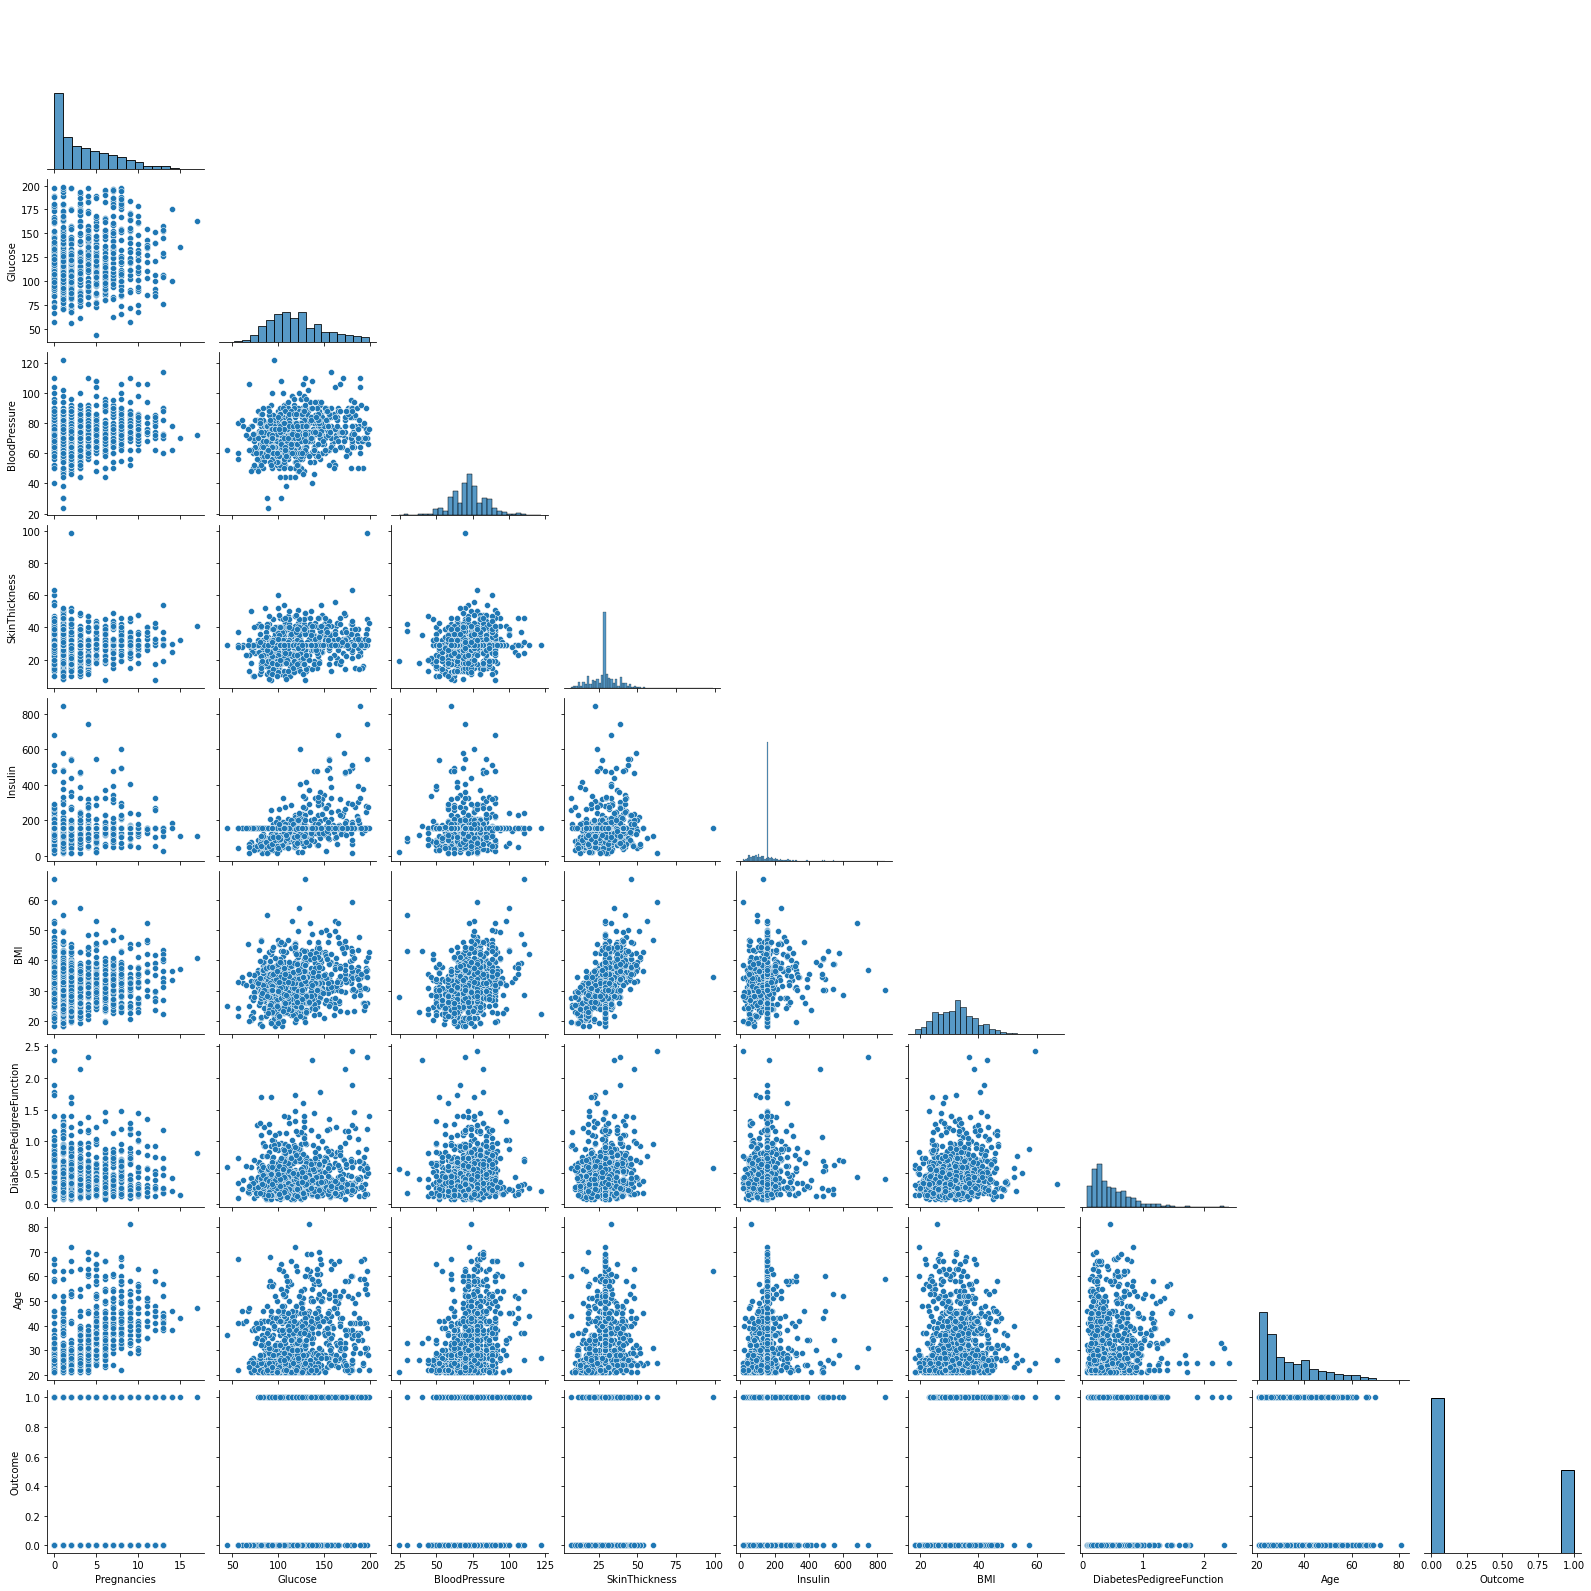

In [34]:
sns.pairplot(df, corner=True)

In [35]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


<AxesSubplot:>

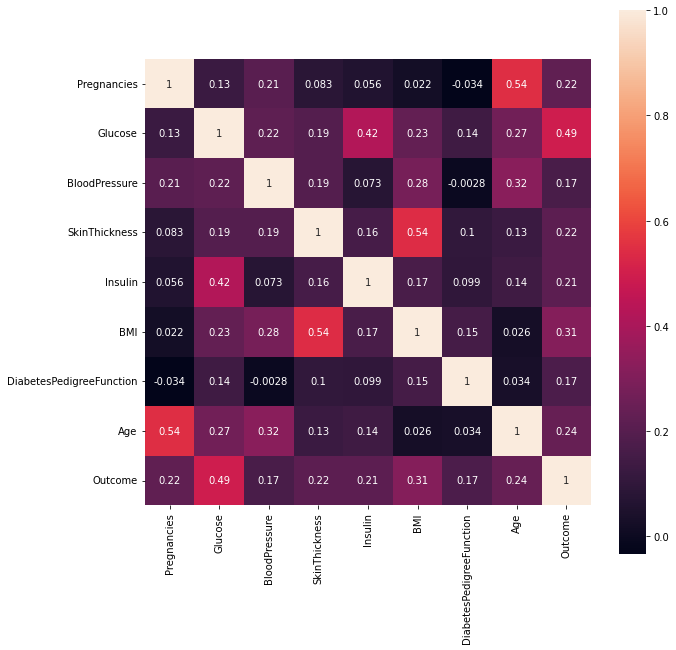

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), square=True, annot=True)

# 2. Model Building

In [39]:
x = df.drop(labels='Outcome', axis=1)
y = df['Outcome']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=11)

In [42]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((614, 8), (154, 8), (614,), (154,))

### Use SMOTE to balance the dataset

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
smt = SMOTE()

In [49]:
xtrain_smt, ytrain_smt = smt.fit_resample(xtrain, ytrain)

In [50]:
xtrain_smt.shape, ytrain_smt.shape

((800, 8), (800,))

### a. Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logreg = LogisticRegression(max_iter=500)

In [53]:
logreg.fit(xtrain_smt, ytrain_smt)

LogisticRegression(max_iter=500)

In [54]:
ypred_logreg = logreg.predict(xtest)

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(ytest, ypred_logreg)

array([[81, 19],
       [19, 35]])

In [57]:
from sklearn import metrics

In [58]:
metrics.recall_score(ytest, ypred_logreg)

0.6481481481481481

In [59]:
metrics.precision_score(ytest, ypred_logreg)

0.6481481481481481

In [60]:
metrics.accuracy_score(ytest, ypred_logreg)

0.7532467532467533

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier()

In [58]:
knn.fit(xtrain_smt, ytrain_smt)

KNeighborsClassifier()

In [59]:
ypred_knn = knn.predict(xtest)

In [60]:
confusion_matrix(ytest, ypred_knn)

array([[69, 25],
       [28, 32]], dtype=int64)

In [61]:
metrics.recall_score(ytest, ypred_knn), metrics.precision_score(ytest, ypred_knn), metrics.accuracy_score(ytest, ypred_knn)

(0.5333333333333333, 0.5614035087719298, 0.6558441558441559)

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfm = RandomForestClassifier()

In [64]:
rfm.fit(xtrain_smt, ytrain_smt)

RandomForestClassifier()

In [65]:
ypred_rf = rfm.predict(xtest)

In [84]:
metrics.recall_score(ytest, ypred_rf), metrics.precision_score(ytest, ypred_rf), metrics.accuracy_score(ytest, ypred_rf), metrics.f1_score(ytest, ypred_rf)

(0.5833333333333334,
 0.6730769230769231,
 0.7272727272727273,
 0.6250000000000001)

In [67]:
confusion_matrix(ytest, ypred_rf)

array([[77, 17],
       [25, 35]], dtype=int64)

In [68]:
print(metrics.classification_report(ytest, ypred_rf))

              precision    recall  f1-score   support



           0       0.75      0.82      0.79        94

           1       0.67      0.58      0.63        60



    accuracy                           0.73       154

   macro avg       0.71      0.70      0.71       154

weighted avg       0.72      0.73      0.72       154




In [69]:
fpr, tpr, _ = metrics.roc_curve(ytest, ypred_rf)

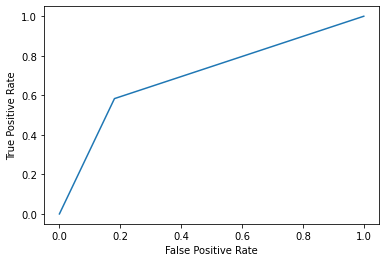

In [70]:
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
metrics.roc_auc_score(ytest, ypred_rf)

0.7012411347517732

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
help(RandomForestClassifier())

Help on RandomForestClassifier in module sklearn.ensemble._forest object:



class RandomForestClassifier(ForestClassifier)

 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

 |  

 |  A random forest classifier.

 |  

 |  A random forest is a meta estimator that fits a number of decision tree

 |  classifiers on various sub-samples of the dataset and uses averaging to

 |  improve the predictive accuracy and control over-fitting.

 |  The sub-sample size is controlled with the `max_samples` parameter if

 |  `bootstrap=True` (default), otherwise the whole dataset is used to build

 |  each tree.

 |  

 |  Read more in the :ref:`User Guide <forest>`.

 |  

 |  Parameter

In [74]:
parameters = {'n_estimators' : [10,50,80,100,150,200,500] , 'criterion' : ['gini', 'entropy', 'log_loss'], 'max_depth' : [5,10,20,30,50,100,200,500], 'min_samples_split' : [2,3], 'min_samples_leaf' : [1,2,5],  'max_features' : ['sqrt', 'log2']}

In [76]:
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, scoring='f1', cv=5, n_jobs=-1, verbose=3)

In [78]:
grid.fit(xtrain_smt, ytrain_smt)

Fitting 5 folds for each of 2016 candidates, totalling 10080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20, 30, 50, 100, 200, 500],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 3],
                         'n_estimators': [10, 50, 80, 100, 150, 200, 500]},
             scoring='f1', verbose=3)

In [79]:
ypred_grid = grid.predict(xtest)

In [80]:
metrics.recall_score(ytest, ypred_grid), metrics.precision_score(ytest, ypred_grid), metrics.accuracy_score(ytest, ypred_grid)

(0.6333333333333333, 0.6785714285714286, 0.7402597402597403)

In [82]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=50)

In [83]:
metrics.f1_score(ytest, ypred_grid)

0.6551724137931035

In [85]:
print(metrics.classification_report(ytest, ypred_grid))

              precision    recall  f1-score   support



           0       0.78      0.81      0.79        94

           1       0.68      0.63      0.66        60



    accuracy                           0.74       154

   macro avg       0.73      0.72      0.72       154

weighted avg       0.74      0.74      0.74       154


